In [425]:
import pandas as pd
import plotly.offline as pyo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data

# this dataframe contains all the features from the dataset
df = pd.read_csv('Spotify_Youtube.csv', index_col=0)

# this dataframe only contains numerical feaures from the dataset
df_int = pd.read_csv('integerData.csv', index_col=0)

# this dataframe is with the number of likes being in bins
df_group = pd.read_csv('grouped_data.csv')

# calculate the IQR
Q1 = df_group.quantile(0.25)
Q3 = df_group.quantile(0.75)
IQR = Q3 - Q1

# determine the fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# identify outliers
outliers = ((df_group < lower_fence) | (df_group > upper_fence)).any(axis=1)

# remove outliers from the dataset
df_group = df_group[~outliers]



In [426]:
# import px
import plotly.express as px

# this is data leakage; however did it to show how if we ran regression including views then the regression analysis would be dominated by the views
fig = px.scatter(df, df['Views'], df['Likes'])
fig.update_layout(xaxis_type='log', yaxis_type='log')


In [427]:
# this includes just the numerical values including the likes into bins

numeric_data = df_group.select_dtypes(include=np.number).columns.tolist()
df_group[numeric_data].describe()
df_group.head()


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Likes,like_groups
11,0.559,0.345,4.0,-13.496,0.0459,0.0576,0.000105,0.1410,0.458,84.581,264307.0,1213572.0,14.0
15,0.427,0.900,11.0,-3.674,0.0499,0.1160,0.000017,0.1190,0.599,104.655,334667.0,1272266.0,15.0
16,0.556,0.913,0.0,-2.360,0.0437,0.0193,0.000009,0.3460,0.730,96.184,282160.0,1456622.0,15.0
47,0.794,0.811,6.0,-8.966,0.0380,0.0426,0.000001,0.1010,0.862,116.047,248413.0,956073.0,14.0
61,0.492,0.969,9.0,-4.419,0.0491,0.0014,0.000001,0.0787,0.538,95.136,157333.0,1102031.0,14.0


In [428]:
# this removes any null values from the dataset

if df_group.isnull().values.any():
    df_group = df_group.dropna()

In [429]:
print(df_group.head())

    Danceability  Energy   Key  Loudness  Speechiness  Acousticness  \
11         0.559   0.345   4.0   -13.496       0.0459        0.0576   
15         0.427   0.900  11.0    -3.674       0.0499        0.1160   
16         0.556   0.913   0.0    -2.360       0.0437        0.0193   
47         0.794   0.811   6.0    -8.966       0.0380        0.0426   
61         0.492   0.969   9.0    -4.419       0.0491        0.0014   

    Instrumentalness  Liveness  Valence    Tempo  Duration_ms      Likes  \
11          0.000105    0.1410    0.458   84.581     264307.0  1213572.0   
15          0.000017    0.1190    0.599  104.655     334667.0  1272266.0   
16          0.000009    0.3460    0.730   96.184     282160.0  1456622.0   
47          0.000001    0.1010    0.862  116.047     248413.0   956073.0   
61          0.000001    0.0787    0.538   95.136     157333.0  1102031.0   

    like_groups  
11         14.0  
15         15.0  
16         15.0  
47         14.0  
61         14.0  


In [430]:
# drop likes column

# df_group_likes contains the likes column
df_group_likes = df_group['Likes']
df_group = df_group.drop(columns=['Likes'])

In [431]:
# df_group_likegroups contains the like_groups column
df_group_likegroups = df_group['like_groups']
df_group = df_group.drop(columns=['like_groups'])

In [433]:
print(df_group.head())

    Danceability  Energy   Key  Loudness  Speechiness  Acousticness  \
11         0.559   0.345   4.0   -13.496       0.0459        0.0576   
15         0.427   0.900  11.0    -3.674       0.0499        0.1160   
16         0.556   0.913   0.0    -2.360       0.0437        0.0193   
47         0.794   0.811   6.0    -8.966       0.0380        0.0426   
61         0.492   0.969   9.0    -4.419       0.0491        0.0014   

    Instrumentalness  Liveness  Valence    Tempo  Duration_ms  
11          0.000105    0.1410    0.458   84.581     264307.0  
15          0.000017    0.1190    0.599  104.655     334667.0  
16          0.000009    0.3460    0.730   96.184     282160.0  
47          0.000001    0.1010    0.862  116.047     248413.0  
61          0.000001    0.0787    0.538   95.136     157333.0  


In [434]:
# ensuring they are all the same length so can run regression

df_group.head()
print(df_group.shape)
print(df_group_likes.shape)
print(df_group_likegroups.shape)

(8417, 11)
(8417,)
(8417,)


In [436]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


# dropping any null values from the dataset

if df_group.isnull().values.any():
    df_group = df_int.dropna()
    

# df_group = df_group.drop(['Likes'], axis=1)

df_group.head()

# Split the data into training and testing sets




,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
11,0.559,0.345,4.0,-13.496,0.0459,0.0576,0.000105,0.1410,0.458,84.581,264307.0
15,0.427,0.900,11.0,-3.674,0.0499,0.1160,0.000017,0.1190,0.599,104.655,334667.0
16,0.556,0.913,0.0,-2.360,0.0437,0.0193,0.000009,0.3460,0.730,96.184,282160.0
47,0.794,0.811,6.0,-8.966,0.0380,0.0426,0.000001,0.1010,0.862,116.047,248413.0
61,0.492,0.969,9.0,-4.419,0.0491,0.0014,0.000001,0.0787,0.538,95.136,157333.0


Score:  0.020434936915891266
MSE:  132267498487.19351
R2:  0.020434936915891266
Coefficients:  [ 2.80594645e+05 -1.89921590e+05  2.09774361e+03  2.72655488e+04
  4.78066389e+05 -1.54164825e+04 -3.33785774e+07  9.03873368e+03
 -1.09835222e+05  5.55893332e+02  8.95031218e-01]


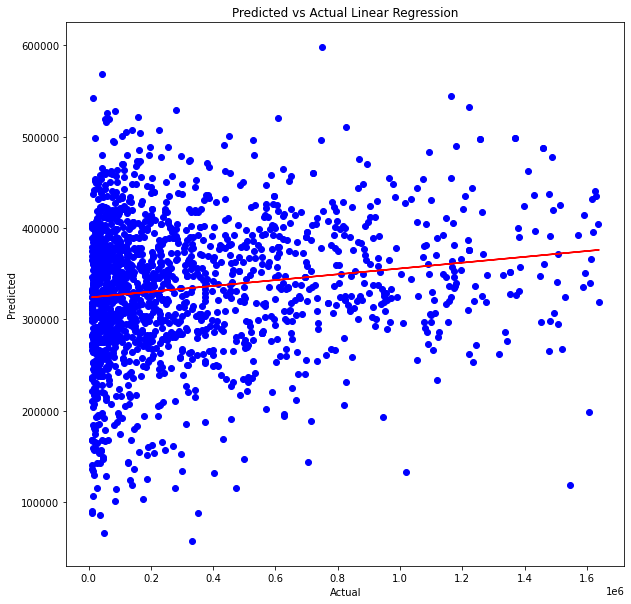

In [437]:
X = df_group
# I run this with Y being both df_group_likes and df_group_likegroups to see how making bins makes an impact
y = df_group_likes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# print Score
print('Score: ', model.score(X_test, y_test))

# get the r squared score

# get the mse
mse = np.mean((y_pred - y_test)**2)
print('MSE: ', mse)

# get the r2_score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2: ', r2)

# plot the predicted vs actual
plt.figure(figsize=(10, 10))
plt.title('Predicted vs Actual Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# print coefficients
print('Coefficients: ', model.coef_)

plt.scatter(y_test, y_pred, color='blue')

fig = px.scatter(df_group, x=y_test, y=y_pred)
# make the x axis and y axis more readable
fig.update_layout(xaxis_type='log', yaxis_type='log')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test, y_pred, 1)

#use red as color for regression line
plt.plot(y_test, m*y_test+b, color='red')




[14:15:28] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
-8230992353.920839
MSE:  117481009934.32248
RMSE: 4.640980


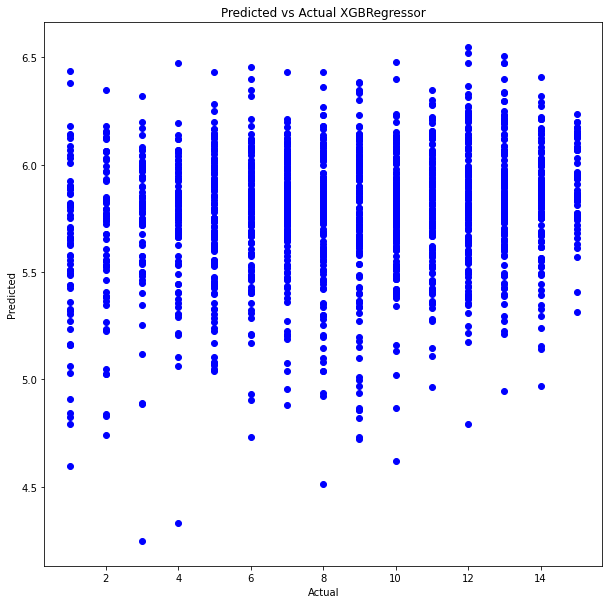

In [438]:
# xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = df_group
# once again ran this with both df_group_likes and df_group_likegroups to see how making bins makes an impact on the XGBRregressor
y = df_group_likegroups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

data_dmatrix = xgb.DMatrix(data=X,label=y)

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

print(model.score(X_test, y_test))
mse = np.mean((y_pred - y_test)**2)
print('MSE: ', mse)

rmse = np.sqrt(mean_squared_error(y_test, preds))

print("RMSE: %f" % (rmse))

# plot predicted versus actual
plt.figure(figsize=(10, 10))
plt.title('Predicted vs Actual XGBRegressor')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(y_test, preds, color='blue')


c:\Users\janvi\miniconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



Learning rate set to 0.05534
0:	learn: 372995.8799657	total: 4.39ms	remaining: 4.38s
1:	learn: 372183.6076350	total: 7.09ms	remaining: 3.54s
2:	learn: 371503.2636543	total: 9.93ms	remaining: 3.3s
3:	learn: 370802.6486017	total: 13.8ms	remaining: 3.44s
4:	learn: 370123.2194520	total: 16.6ms	remaining: 3.29s
5:	learn: 369581.8320389	total: 19.6ms	remaining: 3.25s
6:	learn: 369188.5910899	total: 22.2ms	remaining: 3.15s
7:	learn: 368675.3556182	total: 24.8ms	remaining: 3.08s
8:	learn: 368179.0677429	total: 28.6ms	remaining: 3.15s
9:	learn: 367756.1678514	total: 31.7ms	remaining: 3.13s
10:	learn: 367342.0752217	total: 34ms	remaining: 3.06s
11:	learn: 366882.2340533	total: 36.3ms	remaining: 2.99s
12:	learn: 366400.0235176	total: 38.8ms	remaining: 2.94s
13:	learn: 366029.3652169	total: 41.4ms	remaining: 2.92s
14:	learn: 365636.3931013	total: 44.9ms	remaining: 2.95s
15:	learn: 365278.5647556	total: 47.5ms	remaining: 2.92s
16:	learn: 364989.8440084	total: 50.6ms	remaining: 2.92s
17:	learn: 3645

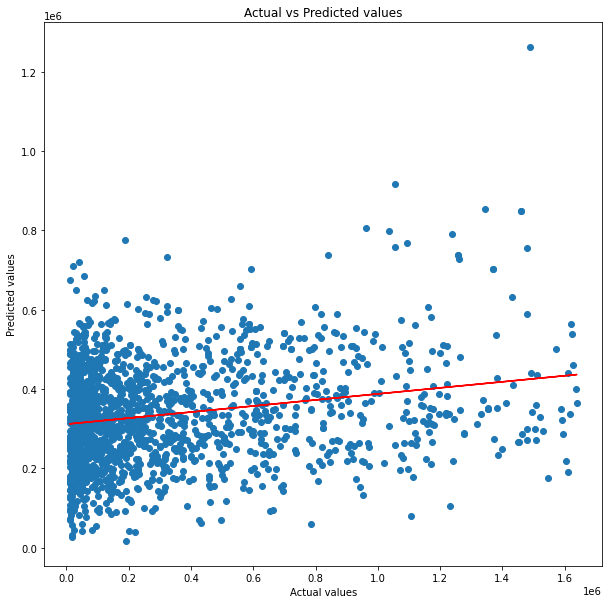

In [444]:
# cat boost

from catboost import CatBoostRegressor

X = df_group
# ran the y with both df_group_likes and df_group_likegroups to see how making bins makes an impact on the CatBoostRegressor
y = df_group_likes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# print accuracy
print('Score: ', model.score(X_test, y_test))
mse = np.mean((y_pred - y_test)**2)
print('MSE: ', mse)
# print mse

# plot predicted versus actual
# plt.figure(figsize=(10, 10))
# plt.title('Predicted vs Actual CatBoostRegressor')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.scatter(y_test, preds, color='blue')

slope, intercept = np.polyfit(y_test, y_pred, 1)
regression_line = slope*y_test + intercept

# Plot the scatter plot and regression line
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred)
plt.plot(y_test, regression_line, color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()





In [440]:
# do pca

# tried doing PCA to get a new set of features to see if that would help with the regression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)
print(X_test_pca.shape)


(6733, 2)
(1684, 2)


Score:  0.02028997007982236
MSE:  132287072889.64319


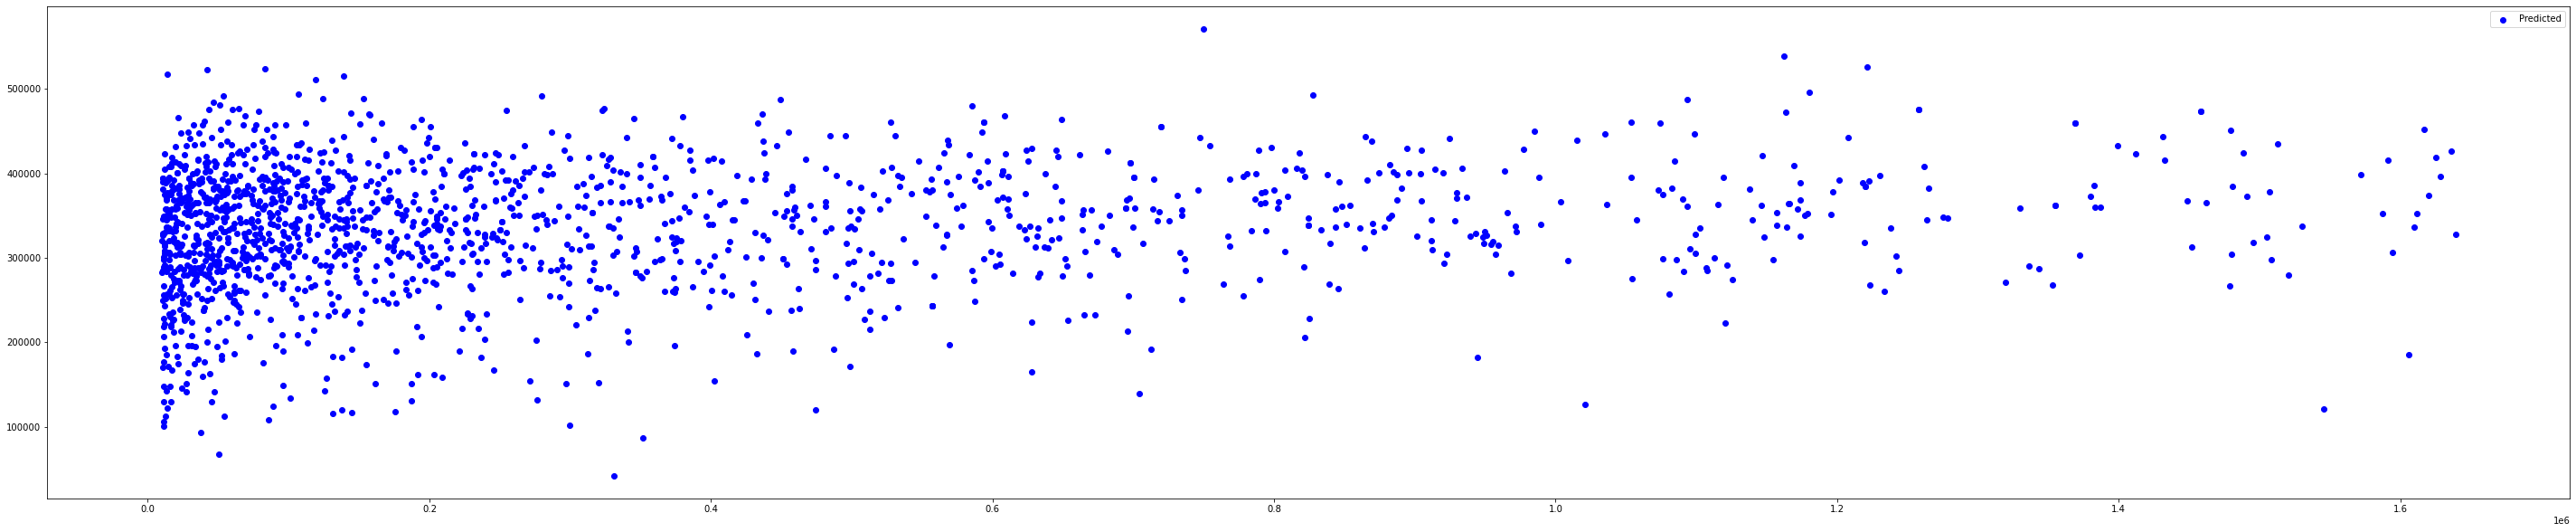

In [445]:
model = LinearRegression()
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

# print score
print('Score: ', model.score(X_test_pca, y_test))

# get the mse
mse = np.mean((y_pred - y_test)**2)

print('MSE: ', mse)

plt.scatter(y_test, y_pred, color='blue')
plt.legend(['Predicted', 'Actual'])

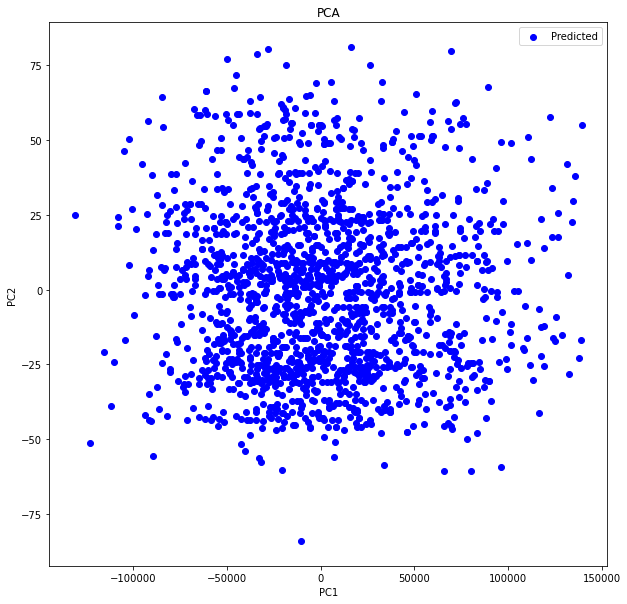

In [442]:
# graph the pca
plt.figure(figsize=(10, 10))
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], color='blue')
plt.legend(['Predicted', 'Actual'])

Score:  0.020289970079812147
MSE:  132287072889.64456


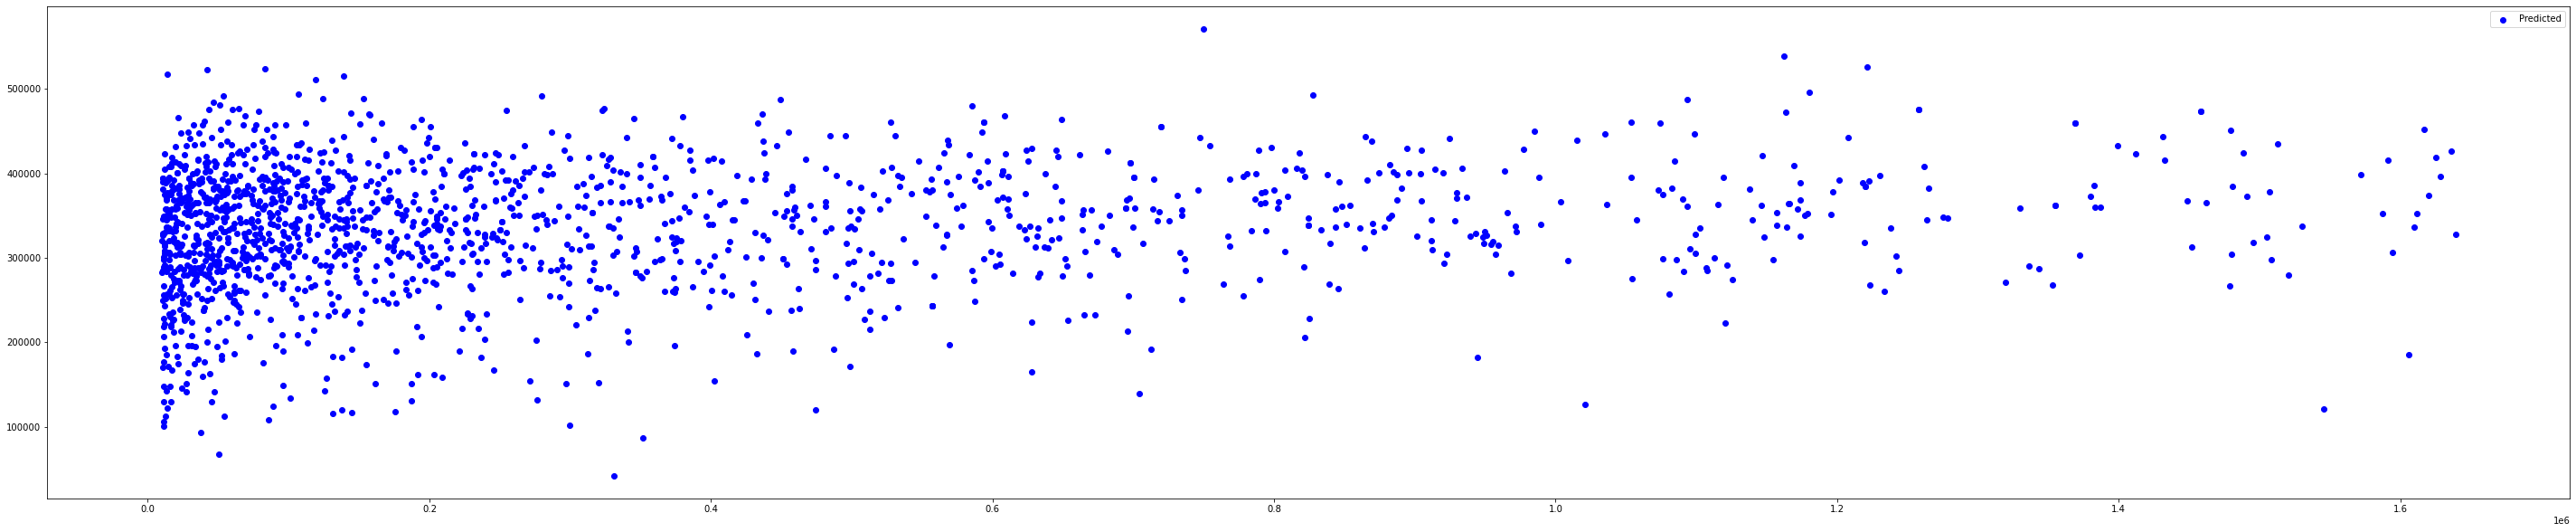

In [446]:
# do PCA


# tried more PCA with a different number of components
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

model = LinearRegression()
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

# print score
print('Score: ', model.score(X_test_pca, y_test))

# get the mse
mse = np.mean((y_pred - y_test)**2)

print('MSE: ', mse)

plt.scatter(y_test, y_pred, color='blue')
plt.legend(['Predicted', 'Actual'])